# 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
pwd

'C:\\shehani\\postdoc_work\\ML_Diffusion\\md_analysis'

In [3]:
#path = "D:/USC/Theory Group/Research/OH_transfer/data/work_oh/long/12_13/water20_60ps/md5"
path='C:/shehani/postdoc_work/ML_Diffusion/md_data/c4_nmeth_frozen_double/'
#path = "C:/Users/Sachith/Desktop/work_oh/different_orientations/orientation3/water_20/thermalization1"

In [4]:
#nstep=int((90125/5)+1)
#natoms=296
#nwater=18
#noh=1
#nox=19
#nhy=18*2+1
#nonmvat=240
#xbox = 12.664 #box lenth in x
#ybox = 13.3552 #box lenth in y
#zbox = 40.000
#xbox = 22.784
#ybox = 13.308

In [5]:
f=open(path +'/input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])
        
nsteps = int((nsteps/MDRestartFrequency)+1)-1
#nsteps = 1000
nstep = nsteps
        
print('nsteps:','  ',nstep )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    1000
natoms:    574
nonmvat:    480
nmovingatoms:    94
MDRestartFrequency:    10
dt:    1.0
noh:    2
nwater:    30
nox:    32
nhy:    62
xbox:    22.797
ybox:    13.392
zbox:    15.0


In [6]:
ox = np.empty(nox,dtype=int)
hy = np.empty(nhy+1,dtype=int)
#ox = np.array([262,265,268,271,274,277,280,283,286,289,292,295,298,301,304,307,310,313,316])
#hy = np.array([263,264,266,267,269,270,272,273,275,276,278,279,281,282,284,285,287,288,290,291,293,294,296,297,299,300,302,303,305,306,308,309,311,312,314,315,317])
#print(ox)
#print(hy)

mm = 0
nn = 1
while mm<(nox):
    ox[mm] = nn+nonmvat
    mm = mm+1
    nn = nn+3

mm = 0
nn =1
while mm<(nhy):
    hy[mm] = nn+nonmvat+1
    hy[mm+1] = nn+nonmvat+2
    mm = mm+2
    nn = nn+3
hy = hy[:-1]

#ox = np.array([150,153,156,159,162,165])
#hy = np.array([151,152,154,155,157,158,160,161,163,164,166])
print(ox)
print(hy)

[481 484 487 490 493 496 499 502 505 508 511 514 517 520 523 526 529 532
 535 538 541 544 547 550 553 556 559 562 565 568 571 574]
[482 483 485 486 488 489 491 492 494 495 497 498 500 501 503 504 506 507
 509 510 512 513 515 516 518 519 521 522 524 525 527 528 530 531 533 534
 536 537 539 540 542 543 545 546 548 549 551 552 554 555 557 558 560 561
 563 564 566 567 569 570 572 573]


In [7]:
msd_of_oh = np.empty(nstep)
msd_of_ohx = np.empty(nstep)
msd_of_ohy = np.empty(nstep)
msd_of_ohz = np.empty(nstep)
oh_index = np.empty(nstep)
xoh = np.empty(nstep)
yoh = np.empty(nstep)
zoh = np.empty(nstep)
atom= ['Non']*(natoms)
x_ox = np.empty(nstep*nox).reshape(nox,nstep)
y_ox = np.empty(nstep*nox).reshape(nox,nstep)
z_ox = np.empty(nstep*nox).reshape(nox,nstep)

x_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy = np.empty(nstep*nhy).reshape(nhy,nstep)

#x_vel = np.empty(nstep*natoms).reshape(natoms,nstep)
#y_vel = np.empty(nstep*natoms).reshape(natoms,nstep)
#z_vel = np.empty(nstep*natoms).reshape(natoms,nstep)
#charge = np.empty(nstep*natoms).reshape(natoms,nstep)
#x_ox[1][439]

In [8]:
jj=0
kk=0
f=open(path +'/geo_end.xyz','r')
lines=f.readlines()
while jj < nstep:
    io=0
    ih=0
    for line in lines[kk+nonmvat+2:(kk+natoms+2)]:
        data=line.split()
        if len(data)>3:
            if data[0]=='O':
                x_ox[io][jj]=float(data[1])
                y_ox[io][jj]=float(data[2])
                z_ox[io][jj]=float(data[3])
                io = io+1
            elif data[0]=='H':
                x_hy[ih][jj]=float(data[1])
                y_hy[ih][jj]=float(data[2])
                z_hy[ih][jj]=float(data[3])
                ih = ih+1
    kk=kk+natoms+2
    jj=jj+1
f.close()

In [9]:
def distans(xo,yo,zo,xh,yh,zh):
    distan = np.sqrt((xh-xo)**2+(yh-yo)**2+(zh-zo)**2)
    #print(distan)
    return distan

In [10]:
def cal_msd(x1,y1,z1,x2,y2,z2):
    msd = np.array([0.0,0.0,0.0,0.0])
    msd[0] = ((x2-x1)**2 +(y2-y1)**2+(z2-z1)**2)
    msd[1] = (x2-x1)**2
    msd[2] = (y2-y1)**2
    msd[3] = (z2-z1)**2
    return msd

In [11]:
msd_of_o = np.empty(nstep*nox).reshape(nox,nstep)
io = 0
while io < nox :
    jj=0
    while jj < nstep :
        msd_of_ox = cal_msd(x_ox[io][0],y_ox[io][0],z_ox[io][0],x_ox[io][jj],y_ox[io][jj],z_ox[io][jj])
        msd_of_o[io][jj] = msd_of_ox[0]
        jj=jj+1
    io = io+1

In [12]:
# ptint msd of O in to a file
f=open(path +'/msdofo.dat','w')
print('\n'.join([''.join(['{0: >#012.6f}'.format(item) for item in row]) for row in msd_of_o]),file =f)
f.close()


In [13]:
x_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
y_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
z_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
x_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)

x_ox_box = x_ox.copy()
y_ox_box = y_ox.copy()
z_ox_box = z_ox.copy()
x_hy_box = x_hy.copy()
y_hy_box = y_hy.copy()
z_hy_box = z_hy.copy()

In [14]:
# move atoms in to the box.
ijk = 1
while ijk < 2:
    print(ijk)
    ijk = ijk+1
    jj=0
    while jj < nstep:
        ii=0
        while ii < nox:
            if x_ox_box[ii][jj]>(xbox/2):
                x_ox_box[ii][jj]=x_ox_box[ii][jj]-xbox
                ijk = 1
            if x_ox_box[ii][jj]<(-xbox/2):
                x_ox_box[ii][jj]=x_ox_box[ii][jj]+xbox
                ijk = 1
            
            if y_ox_box[ii][jj]>(ybox/2):
                y_ox_box[ii][jj]=y_ox_box[ii][jj]-ybox
                ijk = 1
            if y_ox_box[ii][jj]<(-ybox/2):
                y_ox_box[ii][jj]=y_ox_box[ii][jj]+ybox
                ijk = 1
            ii=ii+1
        jj=jj+1
        
    ii=0
    jj=0
    while jj < nstep:
        ii=0
        while ii < nhy:
            if x_hy_box[ii][jj]>(xbox/2):
                x_hy_box[ii][jj]=x_hy_box[ii][jj]-xbox
                ijk = 1
            if x_hy_box[ii][jj]<(-xbox/2):
                x_hy_box[ii][jj]=x_hy_box[ii][jj]+xbox
                ijk = 1
            
            if y_hy_box[ii][jj]>(ybox/2):
                y_hy_box[ii][jj]=y_hy_box[ii][jj]-ybox
                ijk = 1
            if y_hy_box[ii][jj]<(-ybox/2):
                y_hy_box[ii][jj]=y_hy_box[ii][jj]+ybox
                ijk = 1
            ii=ii+1
        jj=jj+1
    
    
#print(x_ox[5][1000],x_ox_box[5][1000])

1
1
1


In [15]:
xperiodic_ox = np.append(x_ox_box,x_ox_box,axis=0) # original and 1
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #2
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #3
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #4
xperiodic_ox = np.append(xperiodic_ox,x_ox_box,axis=0)  #5
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #6
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #7
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #8

yperiodic_ox = np.append(y_ox_box,(y_ox_box+ybox),axis=0) # original and 1
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box+ybox),axis=0) #2
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box),axis=0) #3
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #4
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #5
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #6
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box),axis=0) #7
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box+ybox),axis=0) #8

zperiodic_ox = (z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box)
zperiodic_ox = np.concatenate(zperiodic_ox)

periodic_ox=(ox,ox,ox,ox,ox,ox,ox,ox,ox)
periodic_ox=np.concatenate(periodic_ox)

In [16]:
def water(xo,yo,zo,xh,yh,zh,hy,periodic_ox,nox,nhy):
    jj=0
    rij= np.empty(nhy*nox*9).reshape(nhy,nox*9)
    while jj < nhy:
        ii=0
        while ii < (nox*9):
            rij[jj][ii]=distans(xo[ii],yo[ii],zo[ii],xh[jj],yh[jj],zh[jj])
            ii = ii+1
        jj = jj+1
        
    hoatm = np.empty(nhy*2,dtype=int).reshape(nhy,2)
    wht = np.empty(nox*6,dtype=int).reshape(nox,6)
    hoatm[:][:]=0
    wht[:][:]=0
    j=0 
    while j<nhy:#go over H 
        hh = rij[j][0]
        hoatm[j][0] = hy[j]
        hoatm[j][1] = periodic_ox[0]
        i=1
        while i<(nox*9): #go over in periodic box
            if rij[j][i]<hh: #find shotest bond
                hoatm[j][1] = periodic_ox[i]
                hh = rij[j][i]
            i=i+1
        j=j+1
    nn=0
    while nn<nox:
        wht[nn][0]= periodic_ox[nn]
        mm=0
        kk=1
        while mm<nhy:
            if hoatm[mm][1]==periodic_ox[nn]:
                wht[nn][kk] = hoatm[mm][0]
                kk=kk+1
            mm=mm+1
        nn=nn+1
    return wht

In [17]:
ff=open(path +'/errors.dat','w')

In [18]:
def find_oh(wht,nox):
    wht=wht.astype(int)
    nn=0
    more_oh = 0
    iioh=1
    while nn<nox:
        if wht[nn][2]==0:
            iioh = wht[nn][0]
            more_oh = more_oh+1
        if more_oh>1:
            print('morre than one oh')
            print('morre than one oh',file =ff)
        if wht[nn][1]==0:
            print('O atom found')
            print('O atom found',file =ff)
        if wht[nn][3]>0:
            print('H3O+ found')
            print('H3O+ found',file =ff)
        nn=nn+1
    return iioh

In [19]:
ll=0
while ll<nstep:
    xo = [sub[ll] for sub in xperiodic_ox]
    yo = [sub[ll] for sub in yperiodic_ox]
    zo = [sub[ll] for sub in zperiodic_ox]
    xh = [sub[ll] for sub in x_hy_box]
    yh = [sub[ll] for sub in y_hy_box]
    zh = [sub[ll] for sub in z_hy_box]
    wht = water(xo,yo,zo,xh,yh,zh,hy,periodic_ox,nox,nhy)
    ioh = find_oh(wht,nox)
    koh,=np.where(ox == ioh)
    joh=koh[0]
    if ll==0:
        xoh0 = x_ox[joh][0]
        yoh0 = y_ox[joh][0]
        zoh0 = z_ox[joh][0]
        x_old = x_ox[joh][ll]
        y_old = y_ox[joh][ll]
    
    xmv = 'no'
    ymv = 'no'

    
    if abs(x_ox[joh][ll]-x_old)>5: # atom need to be moved in x
        if x_ox[joh][ll]>x_old:
            x_ox[joh][ll] = x_ox[joh][ll]-xbox
            xmv = 'ne_x'
            #print('atom moved in negative x')
        elif x_ox[joh][ll]<x_old:
            x_ox[joh][ll] = x_ox[joh][ll]+xbox
            xmv = 'po_x'
            #print('atom moved in positive x')
            
    if abs(y_ox[joh][ll]-y_old)>5: # atom need to be moved in y
        if y_ox[joh][ll]>y_old:
            y_ox[joh][ll] = y_ox[joh][ll]-ybox
            ymv = 'ne_y'
            #print('atom moved in negative y')
        elif y_ox[joh][ll]<y_old:
            y_ox[joh][ll] = y_ox[joh][ll]+ybox
            ymv = 'po_y'
            #print('atom moved in positive y')
            
  
    x_old = x_ox[joh][ll]
    y_old = y_ox[joh][ll]
    
    xoh[ll] = x_ox[joh][ll]
    yoh[ll] = y_ox[joh][ll]
    zoh[ll] = z_ox[joh][ll]

    oh_index[ll] = ioh
    if (oh_index[ll]==oh_index[(ll-20)]) and (oh_index[ll]!=oh_index[(ll-1)]): # remove rattaling
        xmv = 'no'
        ymv = 'no'
        llk = ll-19
        kohk,=np.where(ox == oh_index[ll])
        johk=kohk[0]
        print('rattaling')
        while llk<ll:
            xoh[llk] = x_ox[johk][llk]
            yoh[llk] = y_ox[johk][llk]
            zoh[llk] = z_ox[johk][llk]
            oh_index[llk] = oh_index[ll]
            if abs(xoh[llk]-xoh[llk-1])>5: # atom need to be moved in x
                if xoh[llk]>xoh[llk-1]:
                    xoh[llk] = xoh[llk]-xbox
                    xmv = 'ne_x'
                    #print('atom moved in negative x')
                elif xoh[llk]<xoh[llk-1]:
                    xoh[llk] = xoh[llk]+xbox
                    xmv = 'po_x'
                    #print('atom moved in positive x')
            
            if abs(yoh[llk]-yoh[llk-1])>5: # atom need to be moved in x
                if yoh[llk]>yoh[llk-1]:
                    yoh[llk] = yoh[llk]-ybox
                    ymv = 'ne_y'
                    #print('atom moved in negative y')
                elif yoh[llk]<yoh[llk-1]:
                    yoh[llk] = yoh[llk]+ybox
                    ymv = 'po_y'
                   #print('atom moved in positive y')
                
            print('{:<6d}'.format(llk),'{:<6d}'.format(int(oh_index[llk])),'{0: >#016.8f}'.format(xoh[llk]),'{0: >#016.8f}'.format(yoh[llk]),'{0: >#016.8f}'.format(zoh[llk]),xmv,ymv)  
            llk = llk+1
        x_old = xoh[llk-1]
        y_old = yoh[llk-1]
        print('rattaling done')

      

    if (oh_index[ll]==oh_index[(ll-5)]) and (oh_index[ll]!=oh_index[(ll-1)]): # remove rattaling just after hopping
        xmv = 'no'
        ymv = 'no'
        llk = ll-4
        kohk,=np.where(ox == oh_index[ll])
        johk=kohk[0]
        print('rattaling2')
        while llk<ll:
            xoh[llk] = x_ox[johk][llk]
            yoh[llk] = y_ox[johk][llk]
            zoh[llk] = z_ox[johk][llk]
            oh_index[llk] = oh_index[ll]
            if abs(xoh[llk]-xoh[llk-1])>5: # atom need to be moved in x
                if xoh[llk]>xoh[llk-1]:
                    xoh[llk] = xoh[llk]-xbox
                    xmv = 'ne_x'
                    #print('atom moved in negative x')
                elif xoh[llk]<xoh[llk-1]:
                    xoh[llk] = xoh[llk]+xbox
                    xmv = 'po_x'
                    #print('atom moved in positive x')
            
            if abs(yoh[llk]-yoh[llk-1])>5: # atom need to be moved in x
                if yoh[llk]>yoh[llk-1]:
                    yoh[llk] = yoh[llk]-ybox
                    ymv = 'ne_y'
                    #print('atom moved in negative y')
                elif yoh[llk]<yoh[llk-1]:
                    yoh[llk] = yoh[llk]+ybox
                    ymv = 'po_y'
                   #print('atom moved in positive y')
                
            print('{:<6d}'.format(llk),'{:<6d}'.format(int(oh_index[llk])),'{0: >#016.8f}'.format(xoh[llk]),'{0: >#016.8f}'.format(yoh[llk]),'{0: >#016.8f}'.format(zoh[llk]),xmv,ymv)  
            llk = llk+1
        x_old = xoh[llk-1]
        y_old = yoh[llk-1]
        print('rattaling2 done')        

      
    print('{:<8d}'.format(ll),'{:<5d}'.format(ioh),'{0: >#012.8f}'.format(x_ox[joh][ll]),'{0: >#012.8f}'.format(y_ox[joh][ll]),'{0: >#012.8f}'.format(z_ox[joh][ll]),xmv ,ymv )
    #print('{:<6d}'.format(ll),'{:<6d}'.format(ioh),'{0: >#016.8f}'.format(x_ox[joh][ll]),'{0: >#016.8f}'.format(y_ox[joh][ll]),'{0: >#016.8f}'.format(z_ox[joh][ll]),file =f )
    ll=ll+1

morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
0        508    10.08849970  -2.84775630   1.76078876 no no
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
morre than one oh
1        508    10.09169654  -2.89702754   1.74313212 no no
morre than one oh
morre than one oh
morre than one o

1356     298     5.07736115   3.56930174   3.95691205 no no
1357     298     5.10029404   3.55492718   4.01815584 no no
1358     298     5.09131418   3.54983350   4.06817384 no no
1359     298     5.06904436   3.56909974   4.08493837 no no
1360     298     5.07301106   3.60438965   4.07892057 no no
1361     298     5.11145384   3.64310050   4.07799256 no no
1362     298     5.17933497   3.66654346   4.08251513 no no
1363     298     5.25653345   3.66663905   4.09200011 no no
1364     298     5.31712498   3.63986196   4.12686051 no no
1365     298     5.34861614   3.58447579   4.19027518 no no
1366     298     5.37133158   3.52476603   4.26356501 no no
1367     298     5.40113483   3.47201819   4.32719680 no no
1368     298     5.44420966   3.46322613   4.36368666 no no
1369     298     5.46665637   3.48412314   4.38490226 no no
1370     298     5.44834263   3.51829539   4.38675867 no no
1371     298     5.42186299   3.53968172   4.38138094 no no
1372     298     5.42524022   3.54389996

1476     298     4.68859354   4.32275691   4.46092061 no no
1477     298     4.70415730   4.33535132   4.43839460 no no
1478     298     4.71881676   4.35483358   4.41201657 no no
1479     298     4.72836933   4.38045235   4.39001793 no no
1480     298     4.72133641   4.41215030   4.37244720 no no
1481     298     4.70227110   4.45873417   4.34260906 no no
1482     298     4.70128658   4.50956786   4.31216612 no no
1483     298     4.74644742   4.52242865   4.28801055 no no
1484     298     4.82302867   4.49287305   4.28805342 no no
1485     298     4.87435453   4.46986351   4.28443209 no no
1486     298     4.89654384   4.50253752   4.25973568 no no
1487     298     4.91585488   4.55891051   4.22779309 no no
1488     298     4.91509895   4.61200459   4.20090047 no no
1489     298     4.88417908   4.65232096   4.17943448 no no
1490     298     4.85852538   4.67978953   4.18043603 no no
1491     298     4.84253083   4.69064123   4.19508327 no no
1492     298     4.81510347   4.69262734

1613     298     4.87415053   5.00535199   4.00937488 no no
1614     298     4.91486781   4.99509951   4.05344833 no no
1615     298     4.94446619   5.02002361   4.07707322 no no
1616     298     4.94609950   5.05656081   4.08927535 no no
1617     298     4.94222990   5.08660729   4.11621806 no no
1618     298     4.94029081   5.09973399   4.15506754 no no
1619     298     4.93997727   5.11599386   4.19124301 no no
1620     298     4.93009715   5.16143004   4.23791805 no no
1621     298     4.90348088   5.20911379   4.30013613 no no
1622     298     4.86057664   5.23524931   4.38472746 no no
1623     298     4.81107798   5.22198910   4.46695296 no no
1624     298     4.79490217   5.19744506   4.51418513 no no
1625     298     4.80047333   5.17416421   4.50313596 no no
1626     298     4.79587655   5.15792582   4.45568576 no no
1627     298     4.78615629   5.13731780   4.42249758 no no
1628     298     4.80040563   5.10489028   4.42701349 no no
1629     298     4.81538042   5.07131003

1704     298     4.92453625   4.30220205   4.60354542 no no
1705     298     4.91819442   4.32099594   4.63020706 no no
1706     298     4.93131314   4.35554366   4.65881526 no no
1707     298     4.96222750   4.41524012   4.68840067 no no
1708     298     4.98631443   4.49282398   4.73249822 no no
1709     298     4.99079896   4.59522635   4.78026160 no no
1710     298     4.97415223   4.71284966   4.82680601 no no
1711     298     4.93538422   4.79001733   4.81507877 no no
1712     298     4.88616028   4.82679146   4.75882661 no no
1713     298     4.84885718   4.83919801   4.69455784 no no
1714     298     4.82718246   4.81423833   4.64255850 no no
1715     298     4.83933562   4.78802100   4.60526457 no no
1716     298     4.84775720   4.76319787   4.59306529 no no
1717     298     4.84537391   4.72954665   4.61652078 no no
1718     298     4.84073752   4.71452192   4.65540737 no no
1719     298     4.82709781   4.73082978   4.70272480 no no
1720     298     4.77921207   4.75737369

1844     298     4.63112933   5.22848903   4.20304228 no no
1845     298     4.58005720   5.15877551   4.18514420 no no
1846     298     4.60125917   5.09240377   4.13958896 no no
1847     298     4.64868376   5.03585250   4.09412310 no no
1848     298     4.69103593   5.00283601   4.06534983 no no
1849     298     4.73066084   4.99317777   4.06873297 no no
1850     298     4.75577872   5.01149362   4.10445692 no no
1851     298     4.74957865   5.04252730   4.16906666 no no
1852     298     4.72328414   5.07573107   4.23185121 no no
1853     298     4.71433405   5.09505924   4.26654702 no no
1854     298     4.75218094   5.10025290   4.27637383 no no
1855     298     4.79483522   5.08382844   4.28698599 no no
1856     298     4.80728565   5.05816561   4.31668630 no no
1857     298     4.79780041   5.03326793   4.36846208 no no
1858     298     4.78981808   5.03866636   4.42570580 no no
1859     298     4.79107025   5.08126147   4.48302193 no no
1860     298     4.80268548   5.12665061

1981     298     4.65087192   3.96413280   4.32705888 no no
1982     298     4.69415426   3.92887913   4.29047603 no no
1983     298     4.75072933   3.91490492   4.20893830 no no
1984     298     4.77829935   3.92860481   4.10956055 no no
1985     298     4.77728846   3.96036901   4.03611690 no no
1986     298     4.76803573   4.01986873   4.02603828 no no
1987     298     4.76765394   4.08631826   4.06921038 no no
1988     298     4.77325791   4.13166717   4.12521100 no no
1989     298     4.78581350   4.16275322   4.18352959 no no
1990     298     4.79116300   4.21520958   4.24796764 no no
1991     298     4.79026763   4.27931645   4.30013900 no no
1992     298     4.78729887   4.33758069   4.31016935 no no
1993     298     4.78496662   4.38463266   4.29216650 no no
1994     298     4.80033365   4.44337029   4.28082218 no no
1995     298     4.82697894   4.49291176   4.30539727 no no
1996     298     4.84152042   4.53162232   4.34247933 no no
1997     298     4.82575274   4.56729223

2094     298     4.99960432   4.32478127   4.05189761 no no
2095     298     5.05664632   4.34855358   4.03401239 no no
2096     298     5.12025876   4.36934981   4.00456423 no no
2097     298     5.18676375   4.38014831   3.99608057 no no
2098     298     5.23296364   4.35265970   4.01185772 no no
2099     298     5.24308982   4.30708886   4.02804666 no no
2100     298     5.21612459   4.26413922   4.04256343 no no
2101     298     5.19445082   4.24300451   4.03888701 no no
2102     298     5.19224604   4.24188998   4.01588515 no no
2103     298     5.19964547   4.26035375   3.99608410 no no
2104     298     5.19013359   4.28442806   4.00495334 no no
2105     298     5.18440026   4.30119002   4.02813109 no no
2106     298     5.19194836   4.32237473   4.01966456 no no
2107     298     5.15580073   4.29702310   3.97260340 no no
2108     298     5.12074562   4.24892445   3.89271015 no no
2109     298     5.09946896   4.18623729   3.83198457 no no
2110     295     7.31546948   4.75475377

2133     295     7.34514703   4.82508055   4.81128742 po_x no
2134     295     7.36382725   4.72111021   4.83187289 po_x no
2135     295     7.31999071   4.67779696   4.84487140 po_x no
2136     295     7.26279093   4.71483026   4.87277462 po_x no
rattaling
2118   298          5.05569020       4.60191046       3.63718432 no no
2119   298          5.15884906       4.59412568       3.69424521 no no
2120   298          5.21387920       4.56413307       3.75675187 no no
2121   298          5.23981465       4.54432384       3.81126662 no no
2122   298          5.24357153       4.51428749       3.85816994 no no
2123   298          5.23431708       4.47799010       3.91125248 no no
2124   298          5.23097054       4.45477580       3.92854354 no no
2125   298          5.19773163       4.42153131       3.93990959 no no
2126   298          5.20902181       4.37981750       3.91143242 no no
2127   298          5.22440323       4.33971623       3.89070854 no no
2128   298          5.26195270  

2180     298     4.95741627   3.75078104   4.41445132 no no
2181     298     4.96244401   3.76867872   4.34250082 no no
2182     298     4.96999852   3.76231556   4.26185932 no no
2183     298     4.97260724   3.73512954   4.21709604 no no
2184     298     4.96800436   3.71498765   4.21366919 no no
2185     298     4.95519777   3.70465280   4.21981201 no no
2186     298     4.93386689   3.67142505   4.20609103 no no
2187     298     4.91503519   3.66617791   4.17016330 no no
2188     298     4.92773722   3.73340519   4.11310076 no no
2189     298     4.96356559   3.83597375   4.04734556 no no
2190     298     5.00054351   3.90955230   3.97884359 no no
2191     298     5.01935776   3.92598319   3.91602299 no no
2192     298     5.02030405   3.90232065   3.87843024 no no
2193     298     5.00986657   3.85306764   3.87624915 no no
2194     298     5.02573900   3.78773846   3.88508933 no no
2195     298     5.08360216   3.72603478   3.89322919 no no
2196     298     5.16242226   3.67996485

2273     298     4.95650545   4.16351675   4.97612165 no no
2274     298     4.91998358   4.18585716   4.92640489 no no
2275     298     4.86776713   4.20047838   4.89169717 no no
2276     298     4.82481333   4.20662012   4.86071528 no no
2277     298     4.81031719   4.20370092   4.81401107 no no
2278     298     4.83382865   4.16984812   4.74706878 no no
2279     298     4.87897524   4.13397250   4.66637386 no no
2280     298     4.90168846   4.12052740   4.58102810 no no
2281     298     4.85629779   4.13126988   4.49406909 no no
2282     298     4.80597690   4.14038715   4.39886062 no no
2283     298     4.74489980   4.13388132   4.29338279 no no
2284     298     4.68342603   4.14416438   4.22190642 no no
2285     298     4.61255949   4.16021110   4.18035550 no no
2286     298     4.56837640   4.14865310   4.15209029 no no
2287     298     4.56061131   4.10933332   4.11972943 no no
2288     298     4.58679099   4.07550513   4.08319982 no no
2289     298     4.64557064   4.08232584

2394     298     4.66803163   4.00080257   4.77127174 no no
2395     298     4.70480610   4.01737211   4.81457457 no no
2396     298     4.72849212   4.00444006   4.89196133 no no
2397     295     7.13551540   4.53535197   4.97927838 po_x no
rattaling
2379   298          4.91158061       4.28802399       4.73544491 no no
2380   298          4.87218182       4.26608617       4.71056808 no no
2381   298          4.88728309       4.20476448       4.62612971 no no
2382   298          4.90438585       4.15388480       4.51013988 no no
2383   298          4.90702171       4.14061016       4.43288252 no no
2384   298          4.91693103       4.15806693       4.40347295 no no
2385   298          4.90985913       4.17484505       4.41171516 no no
2386   298          4.90207936       4.17613524       4.43169834 no no
2387   298          4.88397666       4.14605761       4.44615815 no no
2388   298          4.82769631       4.09059193       4.50441185 no no
2389   298          4.79330150       4

2465     295     7.40741484   4.87368987   4.73706074 po_x no
2466     295     7.41112479   4.85990595   4.72486134 po_x no
2467     295     7.43294629   4.82125160   4.73084009 po_x no
2468     295     7.41170820   4.81915557   4.75224652 po_x no
2469     295     7.36429629   4.81783551   4.79301929 po_x no
2470     295     7.33818825   4.76218729   4.83734454 po_x no
2471     295     7.30547141   4.69434901   4.86238504 po_x no
2472     295     7.23129933   4.65631469   4.87180925 po_x no
2473     298     4.95666711   3.92832474   5.41194007 no no
rattaling
2455   295          7.61333884       5.01042168       4.60595307 no no
2456   295          7.67550396       5.03935812       4.63112234 no no
2457   295          7.72161200       5.09582583       4.69236576 no no
2458   295          7.73063514       5.13625901       4.78374845 no no
2459   295          7.70407616       5.13178288       4.87475564 no no
2460   295          7.63189468       5.08302100       4.92164468 no no
2461   2

2531     298     5.08465346   3.98372283   5.76489115 no no
2532     298     5.05286144   3.98491579   5.76624144 no no
2533     298     5.01800180   3.96052742   5.76013077 no no
2534     298     5.00346736   3.91260411   5.74576867 no no
2535     298     5.00685197   3.87547435   5.73631980 no no
2536     298     5.00074761   3.85821227   5.74172981 no no
2537     298     4.97806976   3.85013685   5.74115213 no no
2538     298     4.95574659   3.85488154   5.74228928 no no
2539     298     4.93310764   3.86703497   5.76302500 no no
2540     298     4.89972572   3.86870388   5.80722789 no no
2541     298     4.86609764   3.86738005   5.86912136 no no
2542     298     4.85083828   3.86842139   5.93176444 no no
2543     298     4.86580916   3.87464136   5.96857890 no no
2544     298     4.87684193   3.88960687   5.96773928 no no
2545     298     4.85056445   3.90680454   5.94635371 no no
2546     298     4.80802140   3.92379963   5.91662474 no no
2547     298     4.80450229   3.93698678

2672     298     4.29721249   4.91905355   6.06446299 no no
2673     298     4.20251018   4.87325152   6.06068712 no no
2674     298     4.09559840   4.83519447   6.06247595 no no
2675     298     3.99736062   4.84147728   6.05704447 no no
2676     298     3.89756342   4.92499158   6.02614537 no no
2677     298     3.77996190   5.04632103   5.99242016 no no
2678     298     3.68375804   5.13076038   5.99207257 no no
2679     298     3.63838728   5.15074808   5.99475230 no no
2680     298     3.63787954   5.13968940   6.01083918 no no
2681     298     3.59305835   5.16335666   6.01149495 no no
2682     298     3.49470480   5.19615697   5.96409454 no no
2683     298     3.35521375   5.19537308   5.89544236 no no
2684     298     3.23708538   5.15780739   5.84785804 no no
2685     298     3.14518863   5.13619603   5.81863102 no no
2686     298     3.06207189   5.14598958   5.78748567 no no
2687     298     2.99198016   5.16344891   5.76751802 no no
2688     298     2.94976049   5.15565141

2766     298     3.51536952   5.85279146   5.77498524 no no
2767     298     3.55529932   5.84895486   5.75260576 no no
2768     298     3.59581724   5.83194101   5.71423324 no no
2769     298     3.60396136   5.81952013   5.67463131 no no
2770     298     3.61647268   5.80430172   5.64698128 no no
2771     298     3.62010947   5.79912727   5.62193221 no no
2772     298     3.60805638   5.80898542   5.60083499 no no
2773     298     3.60720791   5.80255741   5.58350894 no no
2774     298     3.59521081   5.76699652   5.58700303 no no
2775     298     3.55965529   5.72139691   5.60415999 no no
2776     298     3.52439029   5.70344520   5.61992292 no no
2777     298     3.51110370   5.71660530   5.62480344 no no
2778     298     3.51100596   5.75984663   5.62984864 no no
2779     298     3.52374459   5.80612413   5.61284786 no no
2780     298     3.54660157   5.83011744   5.59075951 no no
2781     298     3.58766277   5.82719208   5.60165759 no no
2782     298     3.63326518   5.79409970

2813     274     4.75080715   4.25678026   4.66889997 no no
rattaling
2795   298          3.59280080       5.77595728       5.79665348 no no
2796   298          3.53578694       5.81239569       5.84074353 no no
2797   298          3.51685081       5.83758302       5.86304561 no no
2798   298          3.53229075       5.81543427       5.87046190 no no
2799   298          3.56913971       5.80678336       5.89952531 no no
2800   298          3.56948066       5.84977639       5.96649465 no no
2801   298          3.53296434       5.88939583       6.03246231 no no
2802   298          3.48369510       5.91906275       6.06833583 no no
2803   298          3.42640940       5.93641052       6.10881297 no no
2804   298          3.42359203       5.89521415       6.13232717 no no
2805   298          3.48415799       5.82216442       6.12446665 no no
2806   298          3.56207557       5.75938266       6.09517513 no no
2807   298          3.55517002       5.75827098       6.14533744 no no
2808   

rattaling
2841   298          4.18962531       5.73990954       5.88434357 no no
2842   298          4.22610067       5.70046942       5.88669720 no no
2843   298          4.26674912       5.62374876       5.85896061 no no
2844   298          4.31526037       5.56239634       5.83882383 no no
2845   298          4.35172406       5.54788406       5.82899742 no no
2846   298          4.36284152       5.56316711       5.82445674 no no
2847   298          4.35161848       5.57246476       5.82662809 no no
2848   298          4.33530345       5.56330494       5.86108967 no no
2849   298          4.33013558       5.56270567       5.90298690 no no
2850   298          4.34567065       5.57334701       5.91908134 no no
2851   298          4.35554096       5.59208258       5.91330458 no no
2852   298          4.36885878       5.62018487       5.88669632 no no
2853   298          4.38576548       5.64392123       5.85522978 no no
2854   298          4.43117451       5.68449620       5.81534043 no

2981     268     3.11965609   6.94860281   5.09835960 no no
2982     268     3.17554579   6.97489063   5.08869864 no no
2983     268     3.24122628   6.99281443   5.09687794 no no
2984     268     3.29210193   6.99849535   5.10556555 no no
2985     268     3.31056544   6.99999892   5.12763900 no no
2986     268     3.30526112   7.02276653   5.15075641 no no
2987     268     3.29572479   7.04703590   5.19137760 no no
2988     268     3.27113632   7.05731506   5.25090933 no no
2989     268     3.22184515   7.04847777   5.31207848 no no
2990     268     3.18374440   7.02896303   5.36829494 no no
2991     268     3.18752600   7.01930151   5.42291130 no no
2992     268     3.23102850   7.02268340   5.48731474 no no
2993     268     3.27907520   7.01952841   5.56951217 no no
2994     268     3.31584454   7.00672124   5.66504228 no no
2995     268     3.34734112   7.00182779   5.74827324 no no
2996     268     3.36760129   6.98886452   5.80744402 no no
2997     268     3.37749464   6.96015277

rattaling
3016   268          3.28037122       6.28291276       5.86947627 no no
3017   268          3.24604174       6.25699230       5.85881608 no no
3018   268          3.21812880       6.25926510       5.82296766 no no
3019   268          3.20968510       6.26626127       5.79879535 no no
3020   268          3.21736076       6.25239311       5.80681695 no no
3021   268          3.22874590       6.21884461       5.82707160 no no
3022   268          3.22410273       6.16870944       5.84612019 no no
3023   268          3.20022426       6.11257513       5.86816333 no no
3024   268          3.19424268       6.07726388       5.90210006 no no
3025   268          3.21592183       6.05354420       5.92416777 no no
3026   268          3.22580417       6.07638437       5.92526124 no no
3027   268          3.21415660       6.12036924       5.90895636 no no
3028   268          3.19452326       6.15331712       5.89507792 no no
3029   268          3.20543209       6.14730220       5.88337784 no

3083     298     4.59273618   4.69217537   5.31577674 no no
3084     298     4.54920110   4.71535507   5.28842041 no no
3085     298     4.50363811   4.77157686   5.27064089 no no
3086     298     4.46285263   4.82965684   5.23743307 no no
3087     298     4.42477801   4.85305775   5.19580213 no no
3088     298     4.39336037   4.82796753   5.16144849 no no
3089     298     4.36965108   4.77267151   5.14823532 no no
3090     298     4.36953210   4.72105466   5.13268325 no no
3091     298     4.38833818   4.70702118   5.11364675 no no
3092     298     4.41292157   4.74634637   5.09919293 no no
3093     298     4.42309571   4.81661523   5.09995145 no no
3094     298     4.42954414   4.87564714   5.09622171 no no
3095     298     4.45209118   4.89157057   5.09023757 no no
3096     298     4.49031529   4.88828805   5.08776600 no no
3097     298     4.53348080   4.89359067   5.09941497 no no
3098     298     4.56365638   4.89615518   5.12952214 no no
3099     298     4.57604687   4.87030850

3222     298     4.99981484   3.92740489   5.92257307 no no
3223     298     4.97000857   3.97531986   5.92124527 no no
3224     298     4.94776968   4.00967605   5.93654805 no no
3225     298     4.94913393   4.01244826   5.97044086 no no
3226     298     4.96096668   4.00308017   6.01132847 no no
3227     298     4.96873940   3.99823737   6.03455861 no no
3228     298     4.97122055   3.99860874   6.02681440 no no
3229     298     4.97880991   3.98586434   5.99533294 no no
3230     298     5.00199924   3.98420797   5.94640292 no no
3231     298     5.04148465   3.98920655   5.89046686 no no
3232     298     5.08061400   3.96874320   5.82071415 no no
3233     298     5.13970989   3.92121825   5.73976745 no no
3234     298     5.21141003   3.86727583   5.66659910 no no
3235     298     5.25717126   3.80543588   5.59967982 no no
3236     298     5.27689037   3.74915315   5.55331888 no no
3237     298     5.28176545   3.70830774   5.53165152 no no
3238     298     5.27406649   3.68902192

3359     298     5.25036621   3.34021635   6.13151557 no no
3360     298     5.26167111   3.33284384   6.11230893 no no
3361     298     5.23371549   3.33450615   6.08689487 no no
3362     298     5.18433492   3.36081433   6.08250106 no no
3363     298     5.14744145   3.41099078   6.11301466 no no
3364     298     5.12789803   3.45119793   6.14976955 no no
3365     298     5.13415602   3.45741281   6.17095015 no no
3366     298     5.15627647   3.43322012   6.14593904 no no
3367     298     5.17071538   3.40861028   6.10595117 no no
3368     298     5.18518137   3.40618756   6.06468030 no no
3369     298     5.19820912   3.45659223   6.00641959 no no
3370     298     5.20061193   3.56167838   5.93739165 no no
3371     298     5.18076462   3.67189230   5.86989292 no no
3372     298     5.15318414   3.72450984   5.80641649 no no
3373     298     5.13586851   3.72565354   5.75672806 no no
3374     298     5.12253850   3.68236715   5.72504921 no no
3375     298     5.11032499   3.61398787

rattaling
3466   298          5.20600072       3.15944824       5.63290174 no no
3467   298          5.25364928       3.15012168       5.57073442 no no
3468   298          5.29321729       3.12576627       5.52601462 no no
3469   298          5.31283923       3.11727917       5.50865600 no no
3470   298          5.30247593       3.13721554       5.53681354 no no
3471   298          5.26710439       3.17507873       5.59183107 no no
3472   298          5.20681609       3.21010879       5.64208812 no no
3473   298          5.15720350       3.25589022       5.70728991 no no
3474   298          5.11692620       3.29588932       5.78923629 no no
3475   298          5.07843822       3.30694812       5.86088026 no no
3476   298          5.03763001       3.28482158       5.90947831 no no
3477   298          5.02120925       3.21459493       5.92246116 no no
3478   298          4.98108876       3.19268887       5.96423271 no no
3479   298          4.93145377       3.21157065       6.01691384 no

3562     298     5.15846622   3.84189819   5.63365985 no no
3563     298     5.14889198   3.81420583   5.65695889 no no
3564     298     5.14580999   3.77247774   5.66131951 no no
3565     298     5.16411222   3.73334587   5.65219630 no no
3566     298     5.18519447   3.69558695   5.61546286 no no
3567     298     5.20573519   3.66963110   5.57843658 no no
3568     298     5.24530296   3.66736566   5.56675948 no no
3569     298     5.31296871   3.66912059   5.55713637 no no
3570     298     5.36683498   3.66725743   5.53646882 no no
3571     298     5.37520477   3.67425130   5.53566193 no no
3572     298     5.37680943   3.66535957   5.56293978 no no
3573     298     5.38620496   3.63036795   5.60988793 no no
3574     298     5.38390427   3.59096314   5.66253504 no no
3575     298     5.38891937   3.53229437   5.70075984 no no
3576     298     5.41893044   3.46536050   5.72077017 no no
3577     298     5.44322487   3.42773785   5.73723898 no no
3578     298     5.44586098   3.45179947

3699     298     5.00048970   3.45702281   5.17357271 no no
3700     298     5.01720660   3.38104128   5.14879465 no no
3701     298     5.05688776   3.32450992   5.13256809 no no
3702     298     5.06840617   3.29855716   5.11293403 no no
3703     298     5.07592259   3.27873192   5.11489240 no no
3704     298     5.12973365   3.26574483   5.14003004 no no
3705     298     5.21074509   3.26520970   5.15384070 no no
3706     298     5.26918398   3.30658974   5.16631305 no no
3707     298     5.25791791   3.37561098   5.17755542 no no
3708     298     5.24741308   3.41742140   5.18577872 no no
3709     298     5.28475335   3.43024203   5.19304662 no no
3710     298     5.36160858   3.44450268   5.21759563 no no
3711     298     5.38395009   3.43605264   5.24377689 no no
3712     298     5.34431867   3.46983605   5.28511122 no no
3713     298     5.30681275   3.55482891   5.35567529 no no
3714     298     5.30253806   3.64229961   5.43233670 no no
3715     298     5.29065647   3.69991391

3839     298     5.18697635   3.82079473   5.78465382 no no
3840     298     5.13124929   3.78047169   5.83589701 no no
3841     298     5.10546901   3.74425223   5.91886743 no no
3842     298     5.12758474   3.69400436   5.98976559 no no
3843     298     5.17124797   3.62880408   6.02800803 no no
3844     298     5.19560624   3.55849193   6.03725651 no no
3845     298     5.17810711   3.50450565   6.01973450 no no
3846     298     5.15231656   3.47895208   6.00342135 no no
3847     298     5.16919437   3.46254929   5.99502297 no no
3848     298     5.19506719   3.43342773   5.97850355 no no
3849     298     5.21005335   3.38916229   5.94243540 no no
3850     298     5.21409797   3.33894097   5.90278525 no no
3851     298     5.23428040   3.30733533   5.87031736 no no
3852     298     5.27004533   3.29722256   5.86657391 no no
3853     298     5.31115422   3.29827770   5.87757534 no no
3854     298     5.32579887   3.31580414   5.86368447 no no
3855     298     5.31981028   3.34017581

3890     298     5.18316399   3.58485327   5.63277127 no no
3891     298     5.12529105   3.61888116   5.61730524 no no
3892     298     5.08627498   3.64402319   5.59513952 no no
3893     298     5.08465436   3.64945348   5.58373079 no no
3894     298     5.12863347   3.63657420   5.60217916 no no
3895     298     5.17678991   3.63414869   5.63429164 no no
3896     298     5.15454007   3.66176171   5.63685281 no no
3897     298     5.08107182   3.69924613   5.60958002 no no
3898     298     5.01383277   3.73702906   5.57404015 no no
3899     298     4.98007966   3.77119301   5.55185629 no no
3900     298     4.97900541   3.79883295   5.53990086 no no
3901     298     4.99411554   3.80264344   5.53967165 no no
3902     298     5.02394525   3.78284113   5.54511083 no no
3903     298     5.04505189   3.73348277   5.55699633 no no
3904     298     5.02078946   3.69042593   5.56262390 no no
3905     298     4.97213923   3.67893177   5.55103554 no no
3906     298     4.94022196   3.67081860

4030     298     5.49161159   3.81454420   5.89299328 no no
4031     298     5.44991546   3.85485275   5.83453064 no no
4032     298     5.40381605   3.90348986   5.78459164 no no
4033     298     5.36024580   3.95109914   5.75839577 no no
4034     298     5.33411512   3.99774255   5.73866413 no no
4035     298     5.31117582   4.01592409   5.68786915 no no
4036     298     5.28343955   4.00447752   5.63508063 no no
4037     298     5.26622319   3.98980106   5.62149502 no no
4038     298     5.22550204   3.99355081   5.64602505 no no
4039     298     5.13001604   3.98044370   5.67028939 no no
4040     298     5.02621658   3.95912579   5.68375043 no no
4041     298     4.98484596   3.93553683   5.70718516 no no
4042     298     5.02432202   3.91317699   5.72336838 no no
4043     298     5.07004697   3.89391855   5.71932428 no no
4044     298     5.09930398   3.89786750   5.73183309 no no
4045     298     5.11253612   3.93049177   5.80839141 no no
4046     298     5.13645577   3.94338810

4121     298     4.90802387   3.38855168   5.81991210 no no
4122     298     4.92304637   3.35480731   5.81277249 no no
4123     298     4.94906148   3.31817144   5.80952610 no no
4124     298     4.97368564   3.27907508   5.81331789 no no
4125     298     4.97862528   3.23478419   5.81875450 no no
4126     298     4.95814443   3.19662214   5.81443553 no no
4127     298     4.91741875   3.18024289   5.81306904 no no
4128     298     4.90825172   3.15889364   5.81546643 no no
4129     298     4.94523556   3.12872302   5.82201505 no no
4130     298     4.98921086   3.08199538   5.82432563 no no
4131     298     4.98113644   3.03993851   5.83938143 no no
4132     298     4.93315689   3.00742689   5.86907780 no no
4133     298     4.90713944   2.98418833   5.90073156 no no
4134     298     4.92740252   2.98830989   5.93565319 no no
4135     298     4.98757860   3.03239118   5.98993581 no no
4136     298     5.07899164   3.10644985   6.04675726 no no
4137     298     5.18443134   3.18530228

4261     298     5.30165473   3.58985060   5.34033164 no no
4262     298     5.37046177   3.48886835   5.30567473 no no
4263     298     5.43423241   3.37943015   5.26039691 no no
4264     295     7.30113589   4.74047845   4.59671051 po_x no
rattaling
4246   298          5.06403492       3.77375428       5.71678981 no no
4247   298          5.01320880       3.82526090       5.76651127 no no
4248   298          4.98897872       3.85521953       5.81006737 no no
4249   298          4.96723943       3.88419918       5.83575877 no no
4250   298          4.94847665       3.88997768       5.83538641 no no
4251   298          4.95053711       3.85460731       5.82594620 no no
4252   298          4.95645493       3.81362366       5.81495964 no no
4253   298          4.96793903       3.78983582       5.79284278 no no
4254   298          4.99109182       3.78992849       5.74633773 no no
4255   298          5.03102204       3.78081064       5.67458002 no no
4256   298          5.09195964       3

4311     298     5.12062435   4.20436113   5.72585590 no no
4312     298     5.14639964   4.17328712   5.68900041 no no
4313     298     5.19994881   4.14937789   5.64133831 no no
4314     298     5.23628661   4.10599718   5.61722961 no no
4315     298     5.27028608   4.04297030   5.62409672 no no
4316     298     5.31955203   3.95106505   5.65433954 no no
4317     298     5.34564712   3.83923025   5.67419590 no no
4318     298     5.33565270   3.75344614   5.67262327 no no
4319     298     5.33333842   3.72594896   5.64734921 no no
4320     298     5.33965777   3.72491592   5.60334294 no no
4321     298     5.32117938   3.70794062   5.55090934 no no
4322     298     5.27962305   3.68290261   5.51555871 no no
4323     298     5.28941020   3.61432395   5.54474973 no no
4324     298     5.35859164   3.53580589   5.60982602 no no
4325     298     5.39115390   3.52205656   5.67340023 no no
4326     298     5.37445020   3.56146283   5.72208644 no no
4327     298     5.33417519   3.61658165

4433     298     5.10993697   3.69210834   5.86092086 no no
4434     298     5.06887019   3.69473132   5.85254627 no no
4435     298     5.02756568   3.71203804   5.86789094 no no
4436     298     5.01086028   3.73294769   5.90504742 no no
4437     298     5.03851678   3.76003142   5.96507220 no no
4438     298     5.08888346   3.77862129   6.03604662 no no
4439     298     5.13331948   3.78392411   6.09688362 no no
4440     298     5.16867940   3.78612879   6.14115455 no no
4441     298     5.19861535   3.80209556   6.17226592 no no
4442     298     5.22423892   3.83280394   6.19035299 no no
4443     298     5.23640369   3.87791313   6.19203003 no no
4444     298     5.24110523   3.89653652   6.17432876 no no
4445     298     5.24149691   3.87139701   6.13718606 no no
4446     298     5.25212373   3.83047584   6.10523239 no no
4447     298     5.25978746   3.80838659   6.10012105 no no
4448     298     5.25602887   3.82143819   6.11672566 no no
4449     298     5.23785911   3.86612794

4530     298     4.85946296   2.30374141   6.55599051 no no
4531     298     4.82695572   2.32674432   6.56722325 no no
4532     298     4.77672760   2.35800644   6.56962976 no no
4533     298     4.73249224   2.38946778   6.53305675 no no
4534     298     4.71423993   2.41147587   6.42903236 no no
4535     298     4.73395003   2.40307658   6.30289102 no no
4536     298     4.79405518   2.35679934   6.19905286 no no
4537     298     4.86487773   2.28380087   6.13018740 no no
4538     298     4.90659041   2.20288996   6.08954919 no no
4539     298     4.91736410   2.13378978   6.07881296 no no
4540     298     4.89475114   2.10201163   6.07007172 no no
4541     298     4.84884880   2.12579907   6.04699974 no no
4542     298     4.82057851   2.18314589   6.00385234 no no
4543     298     4.81453278   2.24128340   5.94171710 no no
4544     298     4.80658541   2.28187547   5.88759693 no no
4545     298     4.78016868   2.29777162   5.86177452 no no
4546     298     4.74608599   2.31252178

4582     268     2.95189976   1.58709099   5.94709805 no ne_y
4583     268     2.91240848   1.67901649   5.93456261 no ne_y
4584     268     2.80546390   1.73821399   5.89400635 no ne_y
4585     268     2.72301478   1.79311596   5.84801762 no ne_y
4586     268     2.68027156   1.82499871   5.78233500 no ne_y
4587     268     2.65988306   1.84164909   5.71758468 no ne_y
4588     268     2.63036102   1.85957705   5.69909325 no ne_y
4589     268     2.57518799   1.87773691   5.73673489 no ne_y
4590     268     2.51289726   1.87975041   5.77071801 no ne_y
4591     268     2.43630230   1.89069377   5.79395028 no ne_y
4592     268     2.33754991   1.93772819   5.80690933 no ne_y
4593     268     2.24641820   2.01772777   5.79871083 no ne_y
4594     268     2.18889769   2.08747717   5.77165127 no ne_y
4595     268     2.13902825   2.13997559   5.73811175 no ne_y
4596     268     2.09490747   2.14575486   5.70082737 no ne_y
4597     268     2.05074348   2.12186532   5.70167896 no ne_y
4598    

4620     298     3.85170482   2.89789054   5.58871581 no no
rattaling
4602   268          1.89897393       2.03566600       5.75968638 no no
4603   268          1.84521774       2.10391817       5.78812831 no ne_y
4604   268          1.83178955       2.11992350       5.86254816 no ne_y
4605   268          1.82688915       2.09403373       5.94018761 no ne_y
4606   268          1.79657453       2.06886699       5.99354635 no ne_y
4607   268          1.77467470       2.05227984       5.99940886 no ne_y
4608   268          1.76924023       2.04825467       5.98661497 no ne_y
4609   268          1.76363270       2.04009400       5.99223351 no ne_y
4610   268          1.75046506       2.00864225       6.02807661 no ne_y
4611   268          1.75094847       1.95100349       6.06901359 no ne_y
4612   268          1.71233267       1.89228821       6.09156593 no ne_y
4613   268          1.68305691       1.85637986       6.10183775 no ne_y
4614   268          1.67925644       1.84666703       6.

rattaling
4624   268          1.97852105       1.52508649       6.25365064 no ne_y
4625   268          2.00204848       1.51957305       6.30134181 no ne_y
4626   268          1.99968400       1.52205218       6.32367360 no ne_y
4627   268          1.99282597       1.54395449       6.31643647 no ne_y
4628   268          1.97401441       1.54593571       6.30645007 no ne_y
4629   268          1.97943145       1.54996100       6.28315351 no ne_y
4630   268          1.99101629       1.52895641       6.26297828 no ne_y
4631   268          2.02156332       1.50018389       6.26083952 no ne_y
4632   268          2.06813275       1.48993417       6.26282263 no ne_y
4633   268          2.08939702       1.51103424       6.25286911 no ne_y
4634   268          2.08750136       1.55801286       6.20227819 no ne_y
4635   268          2.07074223       1.64952508       6.12903494 no ne_y
4636   268          2.06917625       1.77394398       6.07534040 no ne_y
4637   268          2.07270008       1.89

4757     316     3.17965818  -0.19143524   6.19350277 po_x no
rattaling
4739   268          1.87438616       1.85147662       6.01198234 no no
4740   268          1.79739193       1.94550459       6.04728128 no no
4741   268          1.71379336       2.00937156       6.09605162 no no
4742   268          1.65440331       2.02037562       6.15603480 no no
4743   268          1.62779679       1.97977943       6.22036470 no no
4744   268          1.61992550       1.92091125       6.25623114 no no
4745   268          1.62948030       1.90243012       6.25781923 no no
4746   268          1.64015521       1.93645982       6.24057085 no no
4747   268          1.62258089       1.98859627       6.22628127 no no
4748   268          1.58606945       2.01985656       6.21438593 no no
4749   268          1.57015429       2.01993767       6.20297023 no no
4750   268          1.60854717       2.01807972       6.20479296 no no
4751   268          1.65471424       2.04236071       6.20443985 no no
4752 

4824     298     3.23781628   4.70144605   5.49205338 no no
4825     298     3.25136703   4.78770076   5.52058494 no no
4826     298     3.24270686   4.88974790   5.56946035 no no
4827     298     3.23416006   4.95258675   5.61700416 no no
4828     298     3.24129574   4.97754766   5.63838346 no no
4829     298     3.26124959   4.97022537   5.64317123 no no
4830     298     3.26922560   4.93254590   5.65236435 no no
4831     298     3.26497295   4.88055367   5.67849080 no no
4832     298     3.26080296   4.83827408   5.71978730 no no
4833     298     3.22872780   4.81953130   5.77894983 no no
4834     298     3.16608985   4.81288798   5.86289202 no no
4835     298     3.11407533   4.80994310   5.94162133 no no
4836     298     3.09243655   4.82900076   6.01050142 no no
4837     298     3.09713546   4.87708103   6.07771685 no no
4838     298     3.11019768   4.94258363   6.12775155 no no
4839     298     3.10505705   5.00760452   6.14426765 no no
4840     298     3.07502383   5.04412548

4964     298     4.06134546   5.17867537   5.71564876 no no
4965     298     4.04666404   5.18169644   5.63993974 no no
4966     298     4.02512937   5.20191857   5.60628764 no no
4967     298     3.97215735   5.26500277   5.64222107 no no
4968     298     3.90340867   5.35114467   5.70739957 no no
4969     298     3.84481019   5.43351182   5.75469364 no no
4970     298     3.81034522   5.48854308   5.77293808 no no
4971     298     3.81607060   5.49541521   5.76630540 no no
4972     298     3.84003946   5.46613757   5.72587704 no no
4973     298     3.89285232   5.42157151   5.65841213 no no
4974     298     3.98141491   5.35513086   5.59425327 no no
4975     298     4.05176391   5.31269004   5.55469014 no no
4976     298     4.05778665   5.34289112   5.57748356 no no
4977     298     4.03925496   5.40195356   5.64038274 no no
4978     298     3.98450573   5.44005102   5.68609378 no no
4979     298     3.88604277   5.44762382   5.72112340 no no
4980     298     3.75894938   5.43592465

5058   298          3.74827903       5.56888779       6.29527403 no no
5059   298          3.64989155       5.57499941       6.29939523 no no
5060   298          3.56274969       5.56515790       6.28658692 no no
5061   298          3.55235265       5.53614496       6.27117154 no no
5062   298          3.65193395       5.51357713       6.22508175 no no
5063   298          3.78390390       5.49358354       6.15762867 no no
5064   298          3.87109661       5.46420805       6.09175870 no no
5065   298          3.91659806       5.44399657       6.04695066 no no
5066   298          3.95335559       5.45224039       6.01088654 no no
5067   298          3.97234993       5.47541714       5.97726692 no no
5068   298          3.95196559       5.48528515       5.94779566 no no
5069   298          3.90371534       5.50146265       5.90644735 no no
5070   298          3.83400403       5.49394243       5.86488715 no no
5071   298          3.78491561       5.45540635       5.83910274 no no
5072  

5090     298     3.94018243   4.95420992   6.33915065 no no
5091     298     3.96265317   4.95602977   6.37185134 no no
5092     298     3.97246462   4.94649115   6.39727220 no no
5093     298     3.95285613   4.92375544   6.40688509 no no
5094     298     3.93076764   4.90292387   6.42024734 no no
5095     301     5.03902770   2.78772067   5.87058386 ne_x no
rattaling
5077   298          3.81621321       5.17280603       5.81145472 no no
5078   298          3.88024993       5.14761452       5.82794602 no no
5079   298          3.89632713       5.12461020       5.84677995 no no
5080   298          3.91085405       5.08383208       5.87524308 no no
5081   298          3.91673867       5.04460260       5.89748068 no no
5082   298          3.89935369       5.05043735       5.90534914 no no
5083   298          3.88765797       5.08207006       5.93881314 no no
5084   298          3.87019780       5.06892964       5.99465034 no no
5085   298          3.87438477       5.02938072       6.0578

5173     301     4.78256790   3.93046455   4.94020686 ne_x no
5174     301     4.76242439   3.97065393   4.92589917 ne_x no
rattaling
5156   298          4.58997106       5.68141496       5.92629287 no no
5157   298          4.61433173       5.74546417       5.96815937 no no
5158   298          4.62540500       5.79170911       6.01157148 no no
5159   298          4.63267840       5.80300640       6.04874829 no no
5160   298          4.65482379       5.77987362       6.07125244 no no
5161   298          4.67324341       5.75768728       6.06658790 no no
5162   298          4.69998979       5.71465250       6.07478735 no no
5163   298          4.72924553       5.67968424       6.08262572 no no
5164   298          4.76106408       5.64504266       6.09200015 no no
5165   298          4.75225892       5.64791110       6.10233161 no no
5166   298          4.71466640       5.66488213       6.13016533 no no
5167   298          4.65275947       5.69620588       6.17124034 no no
5168   298    

5260     301     4.92977512   2.97104149   4.67068102 ne_x no
5261     301     4.93546103   2.99193456   4.58489853 ne_x no
5262     301     4.92102973   3.05159874   4.50002754 ne_x no
5263     301     4.91593770   3.13063971   4.43443177 ne_x no
5264     301     4.93036094   3.21414476   4.38936309 ne_x no
5265     301     4.95520726   3.28541412   4.35709166 ne_x no
5266     301     4.98069879   3.30574562   4.33221667 ne_x no
5267     301     5.02810685   3.30912557   4.32185227 ne_x no
5268     301     5.08134122   3.30139626   4.31912025 ne_x no
5269     301     5.11879544   3.30518319   4.31958392 ne_x no
5270     301     5.12924597   3.30949966   4.32223072 ne_x no
5271     301     5.13635224   3.32370205   4.31819424 ne_x no
5272     301     5.14578195   3.37152318   4.28917555 ne_x no
5273     301     5.13805475   3.46791204   4.24032390 ne_x no
5274     301     5.12757693   3.56360541   4.18604789 ne_x no
5275     301     5.13947747   3.60668570   4.13436786 ne_x no
5276    

5396     301     5.09061066   3.26376966   4.16831638 ne_x no
5397     301     5.11126791   3.25223788   4.25450505 ne_x no
5398     301     5.12669629   3.22585492   4.31783572 ne_x no
5399     301     5.13424874   3.20100815   4.36576480 ne_x no
5400     301     5.12588600   3.17798371   4.41964926 ne_x no
5401     301     5.12684598   3.15584640   4.47679098 ne_x no
5402     301     5.12124057   3.13220370   4.54167039 ne_x no
5403     301     5.10009923   3.15630750   4.60304887 ne_x no
5404     301     5.07700192   3.23902418   4.64580451 ne_x no
5405     301     5.06369849   3.32871048   4.67508073 ne_x no
5406     301     5.04622900   3.37587480   4.69437559 ne_x no
5407     301     5.02874038   3.38191230   4.68798299 ne_x no
5408     301     5.02798749   3.38759937   4.66309932 ne_x no
5409     301     5.03375495   3.39796581   4.65656374 ne_x no
5410     301     5.07900036   3.40772485   4.65834614 ne_x no
5411     301     5.14904786   3.39088726   4.65815410 ne_x no
5412    

5508     301     4.95890533   4.58620058   4.11878437 ne_x no
5509     301     4.93454966   4.66575936   4.11217656 ne_x no
5510     301     4.89507573   4.72420197   4.07731971 ne_x no
5511     301     4.88446770   4.76848265   4.02643189 ne_x no
5512     301     4.91792663   4.81920556   3.96845727 ne_x no
5513     301     4.95321016   4.88492528   3.91886076 ne_x no
5514     301     4.96370747   4.97181402   3.88453080 ne_x no
5515     301     4.97363058   5.05148266   3.85205295 ne_x no
5516     301     5.00266359   5.12855540   3.81907476 ne_x no
5517     301     5.02292299   5.21577005   3.82542858 ne_x no
5518     301     5.00201637   5.28703331   3.86667778 ne_x no
5519     301     4.97110928   5.33149239   3.93998800 ne_x no
5520     301     4.96983375   5.35120780   4.01601735 ne_x no
5521     301     4.98676141   5.36127200   4.06609477 ne_x no
5522     301     5.02707057   5.36765287   4.08174608 ne_x no
5523     301     5.08099649   5.37416260   4.06675544 ne_x no
5524    

5554   271          4.35161145       3.93575067       3.98186002 po_x no
5555   271          4.32146429       3.95637991       3.92413919 po_x no
5556   271          4.29727522       3.98228938       3.86144276 po_x no
5557   271          4.29845084       3.98174806       3.79861034 po_x no
5558   271          4.32258871       4.00501581       3.75069555 po_x no
5559   271          4.34261346       4.08366514       3.72202974 po_x no
rattaling done
5560     271     4.35729112   4.11480151   3.71571373 po_x no
5561     316     4.62269719   2.46308328   5.55539531 po_x no
rattaling
5543   271          4.11942186       3.59019193       4.23245552 no no
5544   271          4.20915537       3.59827152       4.24658158 no no
5545   271          4.29727726       3.56082327       4.27683648 po_x no
5546   271          4.34781650       3.54148743       4.26967274 po_x no
5547   271          4.34463593       3.58041982       4.21135726 po_x no
5548   271          4.33512840       3.60653413     

5620     271     4.76219894   4.95930142   4.07835363 po_x no
5621     271     4.76646164   4.96162105   4.11770237 po_x no
5622     271     4.79295169   4.96813968   4.18537388 po_x no
5623     271     4.81020640   4.99678353   4.26376542 po_x no
5624     271     4.81576571   5.04430611   4.34632645 po_x no
5625     271     4.83573169   5.09336141   4.39805883 po_x no
5626     271     4.84240694   5.13337376   4.40889011 po_x no
5627     271     4.79751397   5.17706578   4.36264784 po_x no
5628     271     4.71375301   5.21772004   4.29144752 po_x no
5629     271     4.65841349   5.21380467   4.23450661 po_x no
5630     271     4.65995260   5.18356741   4.19848810 po_x no
5631     271     4.68974879   5.14878594   4.17575847 po_x no
5632     271     4.73847411   5.13718270   4.15947658 po_x no
5633     271     4.81623892   5.14375628   4.17278069 po_x no
5634     271     4.89603165   5.15713455   4.18759975 po_x no
5635     271     4.95640955   5.15676523   4.18539033 po_x no
5636    

5753     271     4.14687549   5.06493981   4.30852224 po_x no
5754     271     4.08330066   5.06585460   4.30024802 po_x no
5755     271     4.03904500   5.08262038   4.28154554 po_x no
5756     271     3.99977722   5.07231397   4.25509827 po_x no
5757     271     3.95678327   5.01918499   4.22641190 po_x no
5758     271     3.90104055   4.98552161   4.20453187 po_x no
5759     271     3.84135755   4.98879976   4.17096338 po_x no
5760     271     3.77715155   5.00686847   4.11521287 po_x no
5761     271     3.72588195   5.03365084   4.04932200 po_x no
5762     271     3.68573093   5.07277418   4.00205539 po_x no
5763     271     3.64815197   5.11244679   3.96470335 po_x no
5764     271     3.60140169   5.12157718   3.92767239 po_x no
5765     271     3.56132421   5.09648616   3.90016861 po_x no
5766     271     3.52061359   5.08014429   3.88450930 po_x no
5767     271     3.47858267   5.10318423   3.86186606 po_x no
5768     271     3.42251253   5.13783668   3.82638126 po_x no
5769    

5829     304     5.34162006   3.24730814   5.99816963 no no
5830     304     5.26460042   3.25082183   6.01545451 no no
5831     304     5.14506928   3.25902503   6.03341698 no no
5832     304     5.03378173   3.26834436   6.05469548 no no
5833     304     4.95742792   3.27888800   6.06929867 no no
5834     304     4.90347370   3.28207505   6.04825069 no no
5835     304     4.85959374   3.27905271   5.99746662 no no
5836     304     4.82478855   3.25433975   5.92992381 no no
5837     304     4.80713957   3.23825067   5.91149026 no no
5838     304     4.80018762   3.23889583   5.93908226 no no
5839     304     4.80775953   3.23858460   5.92536573 no no
5840     304     4.86714010   3.24049783   5.86511477 no no
5841     304     4.95411105   3.24869663   5.80102834 no no
5842     304     5.05281145   3.26181063   5.73809718 no no
5843     304     5.12835105   3.28343685   5.67632787 no no
5844     304     5.17830487   3.32217170   5.63142666 no no
5845     304     5.18870657   3.35307541

5877     271     4.84905467   1.66552289   4.58915606 po_x no
5878     271     4.87557614   1.68361307   4.60623252 po_x no
5879     271     4.88902623   1.71678054   4.62399591 po_x no
5880     271     4.86056703   1.72936365   4.63426518 po_x no
5881     271     4.78811427   1.72183805   4.64043633 po_x no
5882     271     4.71369541   1.70875404   4.60860936 po_x no
5883     271     4.64503360   1.71033023   4.54236695 po_x no
5884     271     4.60080741   1.72585306   4.46812655 po_x no
5885     271     4.56738210   1.75037125   4.39049705 po_x no
5886     271     4.55319664   1.76911407   4.33416766 po_x no
5887     271     4.54958847   1.75878927   4.31461678 po_x no
5888     271     4.54531418   1.71693306   4.32553275 po_x no
5889     271     4.53629712   1.69269776   4.34080376 po_x no
5890     271     4.55205976   1.70161961   4.34713951 po_x no
5891     271     4.59278128   1.71763234   4.34056511 po_x no
5892     271     4.62468394   1.71428873   4.32809093 po_x no
5893    

5988     322     1.96236256   2.27066308   6.54619154 no no
5989     322     2.00286939   2.27786849   6.56259983 no no
5990     322     2.02647492   2.30102332   6.55052261 no no
5991     322     2.05971946   2.31194015   6.51572572 no no
5992     322     2.12265604   2.27633257   6.45801377 no no
5993     322     2.20974252   2.22555721   6.39880743 no no
5994     322     2.25688019   2.17785758   6.30855977 no no
5995     322     2.23892197   2.12132622   6.19517685 no no
5996     322     2.18535594   2.07065920   6.10382985 no no
5997     322     2.11316727   2.02447009   6.04818956 no no
5998     322     2.03753571   1.97391617   6.02912016 no no
5999     322     1.96611061   1.93801739   6.02133977 no no
6000     322     1.91854794   1.92167483   6.01668640 no no
6001     322     1.89285946   1.92607754   5.99062807 no no
6002     322     1.89910700   1.93766109   5.93439919 no no
6003     322     1.93494871   1.93380799   5.86102781 no no
6004     322     2.01261725   1.91757767

6073     322     2.53047408   3.33558792   5.80202555 no no
6074     322     2.53724755   3.36811285   5.89941713 no no
6075     322     2.60687994   3.41078259   5.97837184 no no
6076     322     2.69445450   3.46214351   6.04815414 no no
6077     322     2.75107412   3.50106858   6.11600613 no no
6078     322     2.77470606   3.51421356   6.16490454 no no
6079     322     2.81763757   3.51471575   6.19227937 no no
6080     322     2.87843510   3.52290379   6.20410485 no no
6081     322     2.90485582   3.56819483   6.17587858 no no
6082     322     2.88002165   3.62409357   6.13677265 no no
6083     322     2.84615346   3.65091322   6.11353886 no no
6084     322     2.81278778   3.64652982   6.09469924 no no
6085     322     2.76991899   3.64049751   6.10181537 no no
6086     271     5.23908427   3.73885180   6.46390113 po_x no
6087     271     5.20467508   3.79110027   6.48733241 po_x no
rattaling
6069   322          2.57025390       3.19859260       5.67825918 no no
6070   322     

6146     271     4.96613035   3.96676662   5.79231257 po_x no
6147     271     4.95861753   3.98769742   5.82040397 po_x no
6148     271     4.97372157   4.02440390   5.84828563 po_x no
6149     271     4.97716928   4.07134868   5.87177393 po_x no
6150     271     4.96845719   4.10995663   5.89229052 po_x no
6151     271     4.95239303   4.10672914   5.90336972 po_x no
6152     271     4.91855629   4.05689803   5.89242213 po_x no
6153     271     4.86704336   4.00939396   5.87256142 po_x no
6154     271     4.83072326   4.00223554   5.83557166 po_x no
6155     271     4.85243627   4.02510410   5.76942290 po_x no
6156     271     4.91398865   4.03825395   5.68600903 po_x no
6157     271     4.96549932   4.00120340   5.61268300 po_x no
6158     271     5.00044999   3.93412084   5.56948028 po_x no
6159     271     5.04272157   3.87155069   5.56853505 po_x no
6160     271     5.09994095   3.83012815   5.58572279 po_x no
6161     271     5.16227328   3.79456227   5.60083924 po_x no
6162    

6285     271     4.89207296   3.21448382   5.80799147 po_x no
6286     271     4.92445508   3.26701565   5.81812670 po_x no
6287     271     4.95587955   3.34749128   5.81406358 po_x no
6288     271     5.00119650   3.42564746   5.80296739 po_x no
6289     271     5.02344197   3.46828505   5.81302092 po_x no
6290     271     5.01150357   3.46961071   5.84487833 po_x no
6291     271     5.01830190   3.46433271   5.87636270 po_x no
6292     271     5.08137546   3.47531637   5.87509114 po_x no
6293     271     5.15673777   3.48509888   5.83893511 po_x no
6294     271     5.20259189   3.49939705   5.80635861 po_x no
6295     271     5.21583505   3.52229716   5.78224561 po_x no
6296     271     5.21002337   3.56501434   5.76830163 po_x no
6297     271     5.20381346   3.60006937   5.77167170 po_x no
6298     271     5.21898147   3.60888847   5.79898585 po_x no
6299     271     5.24187233   3.58895331   5.84323190 po_x no
6300     271     5.24478485   3.58583409   5.88908495 po_x no
6301    

6420     271     4.75171618   3.39989210   5.52174347 po_x no
6421     271     4.78043574   3.31218618   5.50657854 po_x no
6422     271     4.82409945   3.27110432   5.52534165 po_x no
6423     271     4.84911960   3.26571936   5.56086722 po_x no
6424     271     4.83829585   3.27771745   5.59665247 po_x no
6425     271     4.80686715   3.28997013   5.62632342 po_x no
6426     271     4.77991618   3.31333414   5.63752238 po_x no
6427     271     4.74863427   3.35066040   5.65145457 po_x no
6428     271     4.71224108   3.39164869   5.67147451 po_x no
6429     271     4.69397940   3.40975002   5.68879709 po_x no
6430     271     4.71610995   3.41513213   5.69766249 po_x no
6431     271     4.77863956   3.43413510   5.71766442 po_x no
6432     271     4.85483514   3.47430336   5.75178022 po_x no
6433     271     4.91803070   3.50837735   5.78213676 po_x no
6434     271     4.93515713   3.52500175   5.78746483 po_x no
6435     271     4.91085614   3.53553587   5.79089895 po_x no
6436    

In [20]:
f=open(path +'/oh1.dat','w')
ll=0
while ll<nstep:
    #msd_of_hydoxyl = cal_msd(xoh0,yoh0,zoh0,x_ox[joh][ll],y_ox[joh][ll],z_ox[joh][ll])
    msd_of_hydoxyl = cal_msd(xoh0,yoh0,zoh0,xoh[ll],yoh[ll],zoh[ll])
    msd_of_oh[ll] = msd_of_hydoxyl[0]
    msd_of_ohx[ll] = msd_of_hydoxyl[1]
    msd_of_ohy[ll] = msd_of_hydoxyl[2]
    msd_of_ohz[ll] = msd_of_hydoxyl[3]
    #print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index[ll])),'{0: >#016.8f}'.format(xoh[ll]),'{0: >#016.8f}'.format(yoh[ll]),'{0: >#016.8f}'.format(zoh[ll]))
    print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index[ll])),'{0: >#016.8f}'.format(xoh[ll]),'{0: >#016.8f}'.format(yoh[ll]),'{0: >#016.8f}'.format(zoh[ll]),file =f)  
    ll = ll+1

In [21]:
#x_ox[1][329]
zoh0

1.76078876

In [22]:
ox

array([481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517,
       520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 550, 553, 556,
       559, 562, 565, 568, 571, 574])

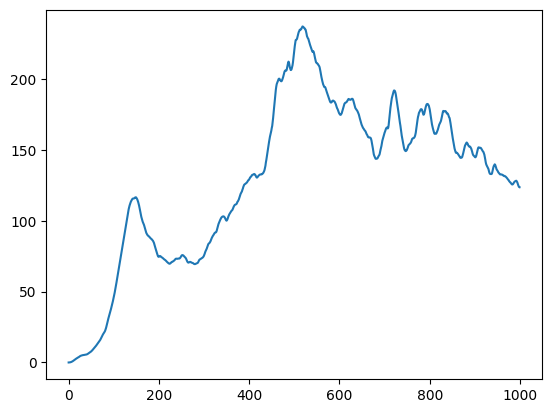

In [23]:
plt.figure()
plt.plot(msd_of_o[:][3])

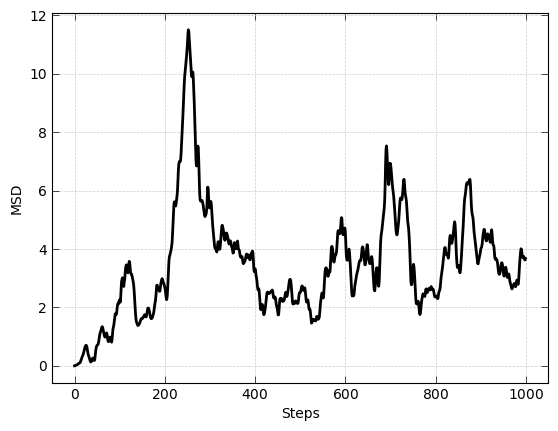

In [24]:
#diffusion in xy
plt.figure()
plt.plot(msd_of_oh[:],color='k',linewidth=2)
plt.xlabel('Steps')
plt.ylabel('MSD')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.ylim([0,50])
#plt.xlim([7200,7400])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig(path +'/msd.jpg', dpi=400)

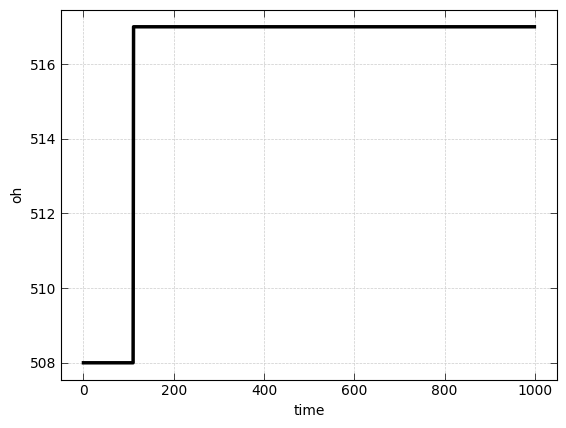

In [25]:
#no hopping
plt.figure()
plt.plot(oh_index[:],color='k',linewidth=2.5)
plt.xlabel('time')
plt.ylabel('oh')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
#plt.xlim([590,620])
#plt.ylim([260,317])
#plt.ylim([357,386])
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
#plt.grid(b=True,which='minor',color='#CCCCCC', linestyle='-.', linewidth=0.5)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig(path +'/ohindex.jpg', dpi=400)

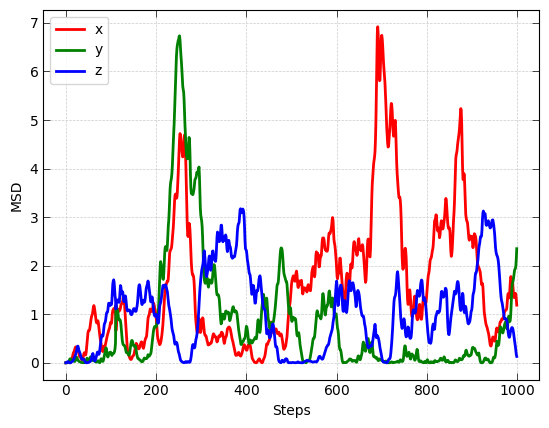

In [26]:
#calculated MSD as a function of time
plt.figure()
plt.plot(msd_of_ohx[:],color='r',linewidth=2,label="x")
plt.plot(msd_of_ohy[:],color='g',linewidth=2,label="y")
plt.plot(msd_of_ohz[:],color='b',linewidth=2,label="z")
plt.legend(loc="upper left")
plt.xlabel('Steps')
plt.ylabel('MSD')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.xlim([0,100000])
#plt.ylim([0,50])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig(path +'/msdxyz.jpg', dpi=400)

In [27]:
time=np.arange(len(msd_of_oh))
time=time/1000
fit=np.polyfit(time[250:1250],msd_of_oh[250:1250],1)
np.poly1d(fit)

poly1d([-1.14938949,  4.54642461])

In [28]:
fit[0]/6

-0.19156491580821475

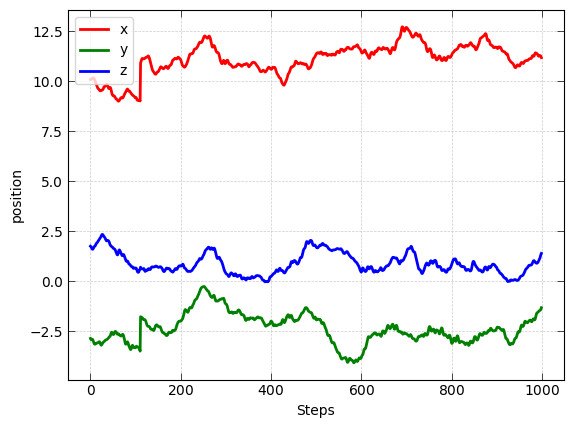

In [29]:
plt.figure()
plt.plot(xoh[:],color='r',linewidth=2,label="x")
plt.plot(yoh[:],color='g',linewidth=2,label="y")
plt.plot(zoh[:],color='b',linewidth=2,label="z")
plt.legend(loc="upper left")
plt.xlabel('Steps')
plt.ylabel('position')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.xlim([0,14000])
#plt.ylim([0,20])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig(path +'/xyzofoh.jpg', dpi=400)

In [30]:
kk=0
f=open(path +'/msd_xyz.dat','w')
while kk < nstep :
    print('{:<6d}'.format(kk+1),'{0: >#016.8f}'.format(msd_of_oh[kk]),'{0: >#016.8f}'.format(msd_of_ohx[kk]),'{0: >#016.8f}'.format(msd_of_ohy[kk]),'{0: >#016.8f}'.format(msd_of_ohz[kk]),file =f )
    kk=kk+1
f.close()

In [31]:
kk=0
f=open(path +'/oh_xyz.dat','w')
while kk < nstep :
    print('{:<6d}'.format(kk+1),'{0: >#016.8f}'.format(xoh[kk]),'{0: >#016.8f}'.format(yoh[kk]),'{0: >#016.8f}'.format(zoh[kk]),file =f )
    kk=kk+1
f.close()

In [32]:
msd_of_oh[326]

4.757669421330872

In [33]:
(xbox*ybox*10)*0.0333679

101.87133914289598

In [34]:
12.54*3.4

42.635999999999996

In [35]:
((xbox*ybox*10)-(12.54*3.4))*0.0333679

100.44866535849599

In [36]:
12.664*13.3552*18*0.0333679

101.58338452329217

In [37]:
((12.664*13.3552*19)-(12.54*3.4))*0.0333679

105.80423210129727

In [38]:
122*3

366

In [39]:
354/3

118.0

In [40]:
(327-21)/3

102.0